<a href="https://colab.research.google.com/github/rogerioMB-hub/google_colab/blob/main/Predictions03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch
import torch.nn as nn
#import numpy as np
import matplotlib.pyplot as plt

 - criando um dataset para treinar a nn

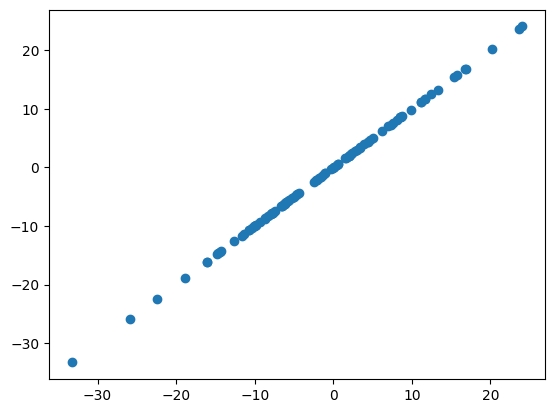

In [47]:
x = 10 * torch.randn(100, 1)    # criando tensor com 100 linhas e 1 coluna de
                                # valores normalmente distribuidos entrados em 0
                                # com pequena variância. Multiplicados por 10 tem-se
                                # um melhor espaçamento entre eles (visualização)
y = x

plt.scatter(x.numpy(), y.numpy())
plt.show()

 - agora, adicionando um certo "ruido aleatório" aos dados da função y = x apresentada acima:

In [48]:
y = x + (3 * torch.randn(x.size()))

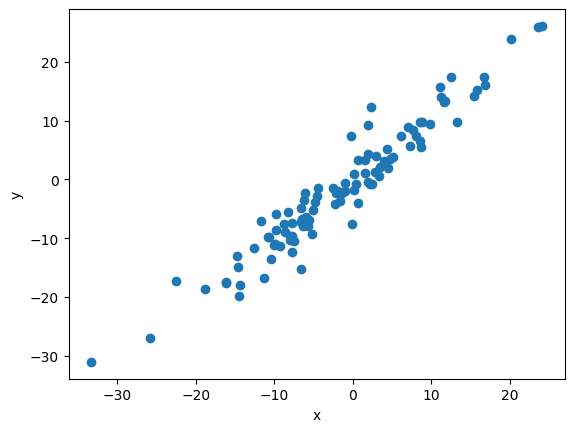

In [49]:
plt.ylabel('y')
plt.xlabel('x')
plt.scatter(x.numpy(), y.numpy())
plt.show()

 - criando a classe LinearRegression (já discutida em Predictions02) para definição de um modelo linear.

In [50]:
class LinearRegression(torch.nn.Module):
  def __init__(self, input_dim, output_dim):              #inicializador/construtor de instancias
    super(LinearRegression, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)  #função linear com pesos(w) e bias(b) aleatórios

  def forward(self, x):
    pred = self.linear(x)
    return pred

 - criando o modelo com base na classe LinearRegression

In [51]:
  torch.manual_seed(1)
  model1 = LinearRegression(1, 1)     # criando um objeto model1
  print(list(model1.parameters()))    # imprimindo seus parametros em forma de lista para melhor visualização

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


 - obtendo os parametros do modelo criado para desenhar linha sobre os dados gerados para treinamento

In [52]:
[w, b] = model1.parameters()
print(w, b)                     # os parametros estão como tensores
print(w.shape, b.shape)
w1 = w[0][0].item()             # seguindo o shape, utilizo acesso a 2 dimensoes
b1 = b[0].item()                # aqui só há uma
print(w1, b1)                   # w1 e b1 agora como numeros python

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)
torch.Size([1, 1]) torch.Size([1])
0.5152631998062134 -0.44137823581695557


 - criando uma função para obter os parametros w e b, da mesma forma que fizemos acima

In [53]:
def get_params(w_, b_):
  return w_[0][0].item(), b_[0].item()

 - aplicando a função get_params

In [54]:
[w, b] = model1.parameters()
w1, b1 = get_params(w, b)
print(w1, b1)

0.5152631998062134 -0.44137823581695557


 - plotando oscatter com os pontos gerados anteriormente e com uma linha reta (vermelha) sobre os mesmos. Desta forma é possível analisar graficamente o modelo gerado aleatoriamente e os dados em distribuição normal, também gerados aleatoriamente.

In [55]:
def plot_fit(title, w, b, xs, ys):
  plt.title = title
  # obter parametors numericos w1 e b1 dos tensores w e b
  w1, b1 = get_params(w, b)
  # gerar array com dados de -30 a 30 para valores de x e assim plotar a função
  x_ = np.array([-30, 30])
  # calcular valores de y (no array y_) para poder plotar a função
  y_ = w1 * x_ + b1
  # plotar os pontos gerados
  plt.plot(x_, y_, 'r')
  plt.scatter(xs.numpy(), ys.numpy())
  plt.show()

 - plotando os dados (x e y) e a linha reta do modelo gerado.

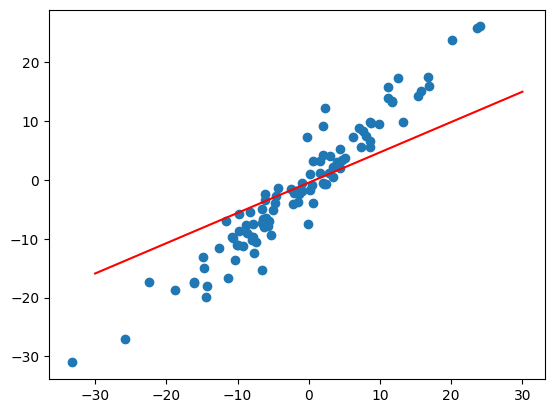

In [56]:
[w, b] = model1.parameters()
plot_fit('Modelo inicial', w, b, x, y)

Obs: claramente o modelo não corresponde aos dados gerados.Para que um ajuste seja feito será preciso rotacionar a reta (alterando/corrigindo valores de w) e deslizando (para cima ou para baixo) a reta através do também ajuste de b.